# Assignment 1
## Dataset: employee.csv

In [1]:
# Setup
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, math

# Import file as dataframe
df = pd.read_csv('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/employee.csv')

# And take a sneak peek of what's inside
print('Rows: ' + str(df.shape[0]))
print('Cols: ' + str(df.shape[1]))
df.head()


Rows: 1470
Cols: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Describing the continuous variables
Let's start by looking what's happening with the numbers.
Here transposing the output provides a nicer view

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Visualising distributions

It's quite tedious to get any insight out of wall full of numbers, so let's draw some plots instead.

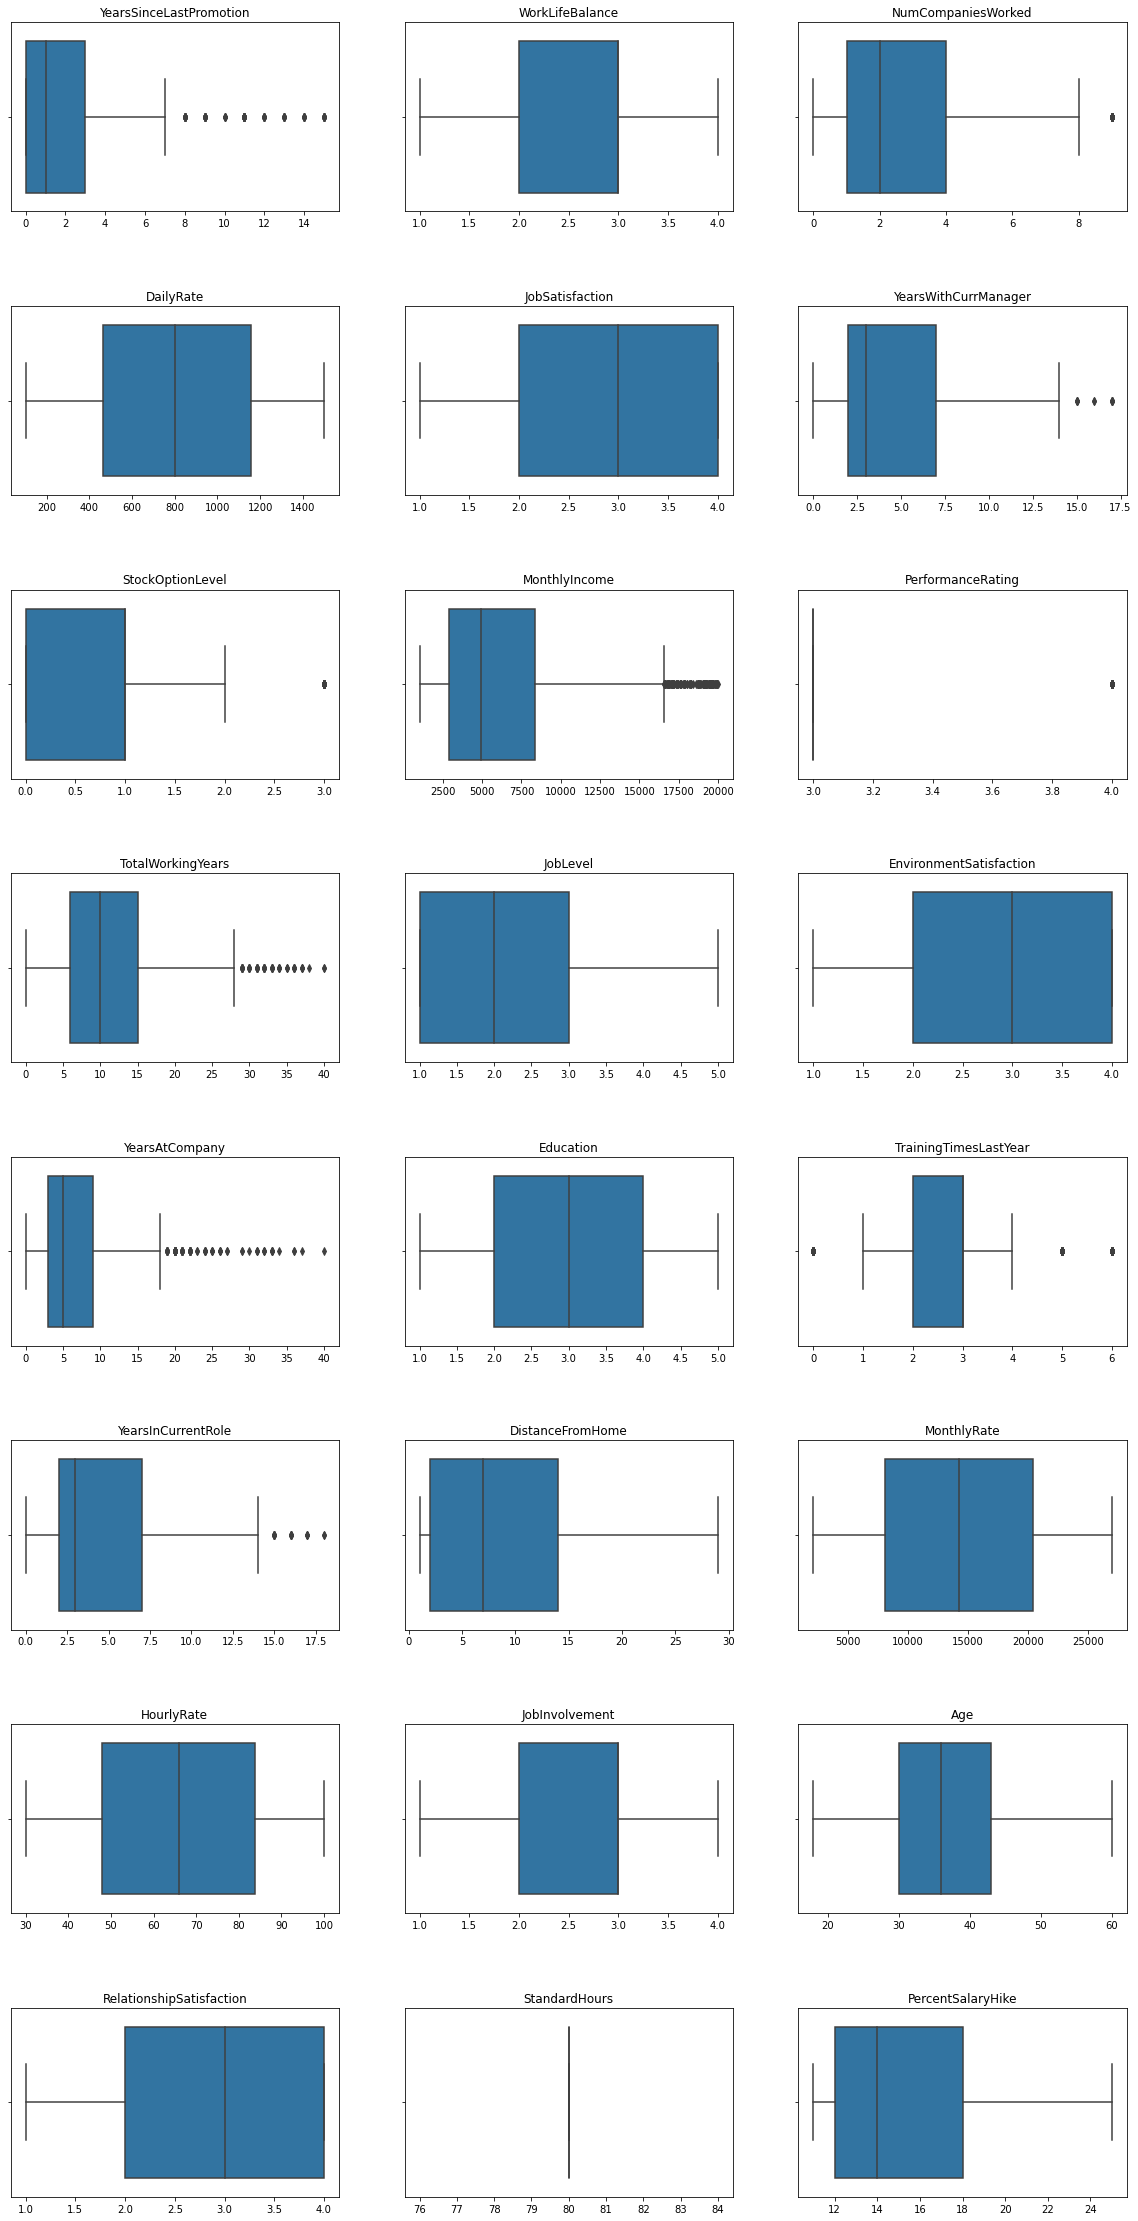

In [39]:
# List of unwanted attribues
excl=['EmployeeCount', 'EmployeeNumber']

# Get all numeric variables not explicitly listed in excl-list
conts = list(set(df.select_dtypes(exclude='object').columns.tolist())-set(excl))

contlen = len(conts)

# How many subplots to draw size-by-size
ncols = 3

# Define drawing board and subplot margins
fig = plt.figure(figsize=(20, 40))
plt.subplots_adjust(hspace=0.5)

for i, c in enumerate(conts):
    ax = fig.add_subplot(
        math.ceil(contlen / ncols), ncols  # Figure out a proper grid size,
        , i+1                              # tell the subplot its place on the grid
        , title=c                          # and title accordingly.
        )
    sns.boxplot(x=df[c].values, ax=ax)     # Draw plot and place it in the created subplot axis 

## Initial findings on numeric variables
Now initial observations start to pop out by themselves, e.g.
* Some variables are rubbish in analytical sense, e.g. EmployeeNumber and EmployeeCount and should be left out of further analysis
* Most of the employees are 30-40+ years old
* People tend to stay in single position under same manager for 2-3 years, while few have been stuck in their potholes for ages
* Satisfaction to work, environment and relationship is generally on the positive side, while work life balance is rather evenly distributed between negative and positive.
* Rather many high outliers in monthly income, c-level management and/or top salespersons maybe?

# Categorical variables

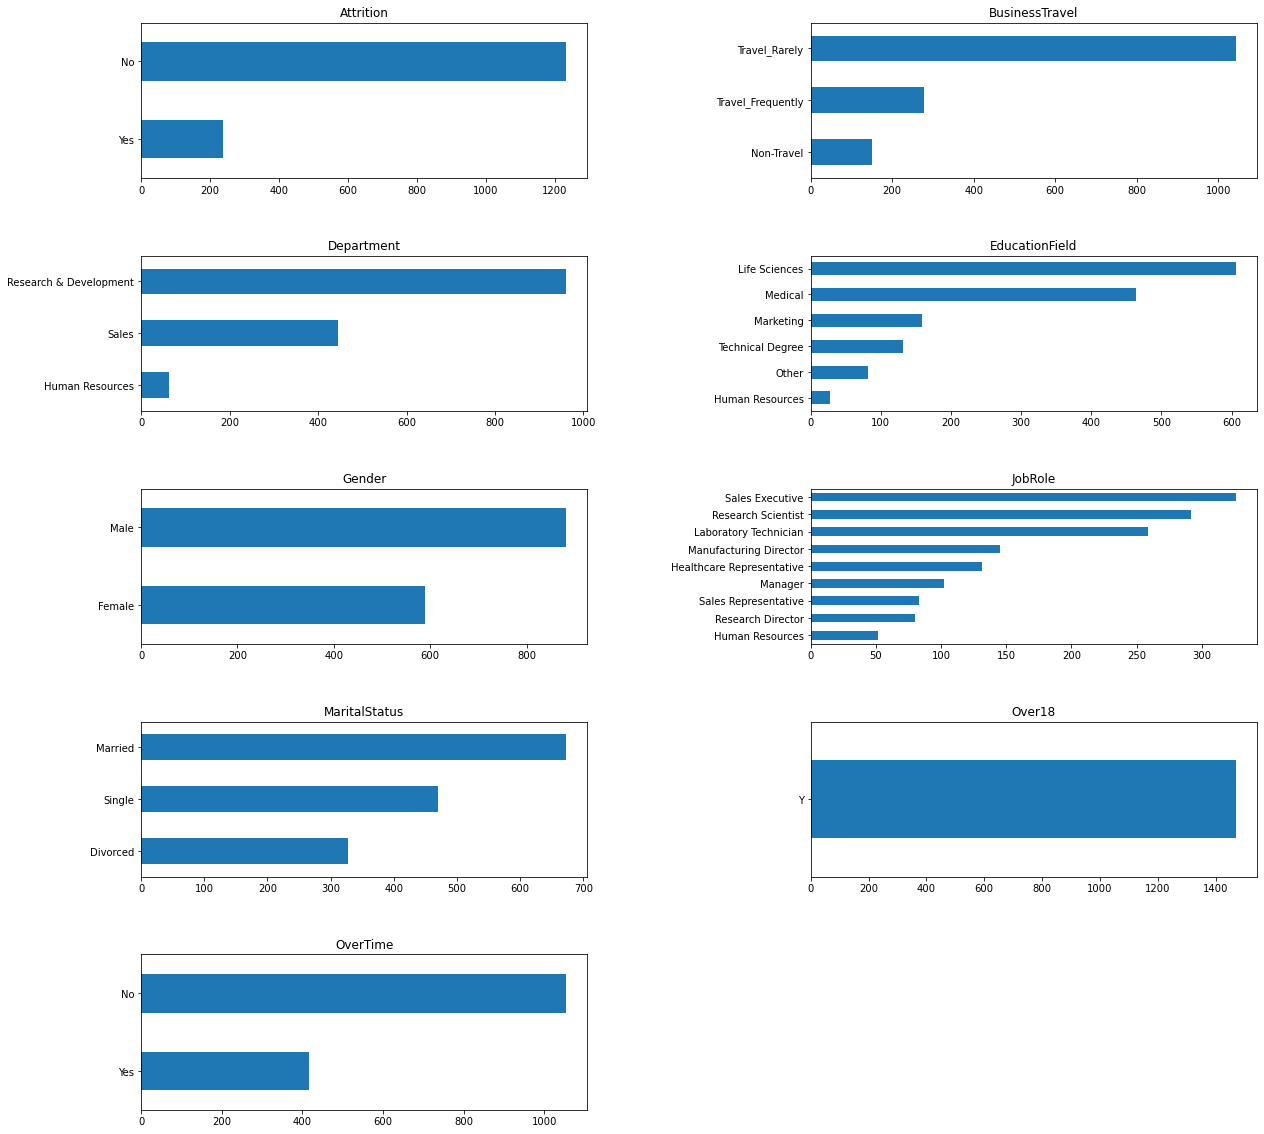

In [36]:
# Get all non-numeric attributes
cats = df.select_dtypes(include='object').columns.tolist()
catlen = len(cats)

# How many subplots to draw size-by-size
ncols = 2

# Define drawing board for plots
fig = plt.figure(figsize=(20, 20))

# Add some space between subplots
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

# Iterate trough all categorical variables, and draw barcharts for each category with levels sorted by the number of occurences
for i, c in enumerate(cats):
     # Sorted counts for category levels
     levels = df[c].value_counts().sort_values()

     ax = fig.add_subplot(
          math.ceil(catlen / ncols), ncols   # Figure out a proper grid size,
          , i+1                              # tell the subplot its place on the grid
          , title=c                          # and title accordingly.
          )
     levels.plot.barh(ax=ax)                 # Draw a barchart from value counts and place it to the newly created subplot



## Initial findings on categorical variables

* Everyone is over 18
* R&D is most staffed department
* Single and divorced represent a bigger share of employees than married ones.
* Quite many with a Sales Executive role compared to Sales Representative
* Most of the staff travel rarely and also avoid doing overtime, while both are by no means uncommon practicies either


# Next steps
* Cherrypick a set of variables from areas of interest and initial assumptions
* Look for interactions between variables
* Find positive and negative correlations
* And enjoy other happy observations 